In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator


In [2]:
path = "Data" 
labelFile = 'labels.csv' 
batch_size_val=50  
steps_per_epoch_val=668
epochs_val=55
imageDimesions = (32,32,3)
testRatio = 0.2    
validationRatio = 0.2 


In [3]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        curImg.resize(imageDimesions)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)


Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [5]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

Data Shapes
Train(36739, 32, 32, 3) (36739,)
Validation(9185, 32, 32, 3) (9185,)
Test(11481, 32, 32, 3) (11481,)


In [6]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))


data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


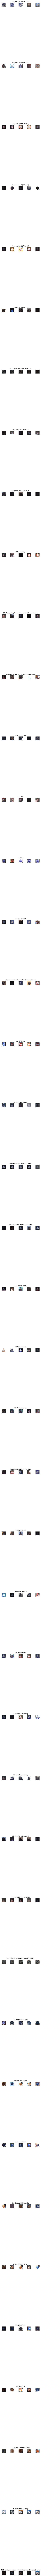

In [7]:
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))


[367, 1652, 1808, 1179, 1552, 1400, 764, 1103, 996, 1248, 1419, 1147, 1523, 1546, 816, 689, 758, 922, 967, 399, 654, 623, 577, 698, 483, 896, 1140, 450, 1026, 478, 841, 448, 451, 404, 499, 698, 465, 363, 1218, 549, 656, 423, 444]


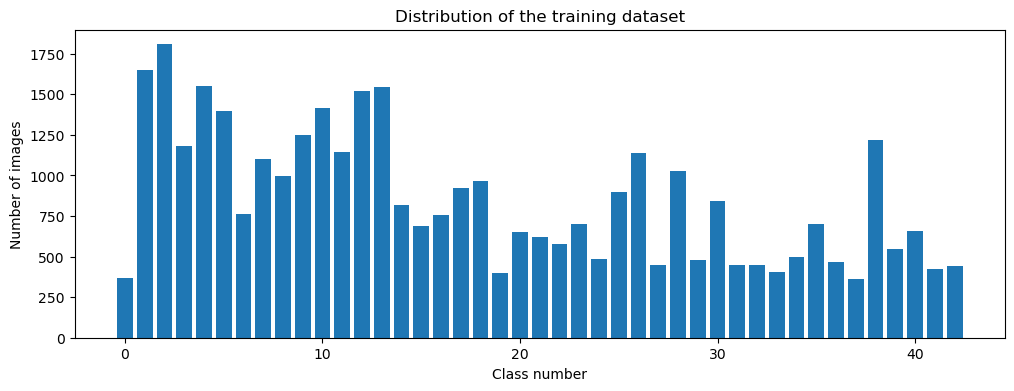

In [8]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 

In [9]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)    
    img = equalize(img)      
    img = img/255            
    return img
 
X_train=np.array(list(map(preprocessing,X_train))) 
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)])
 

In [10]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
 
 

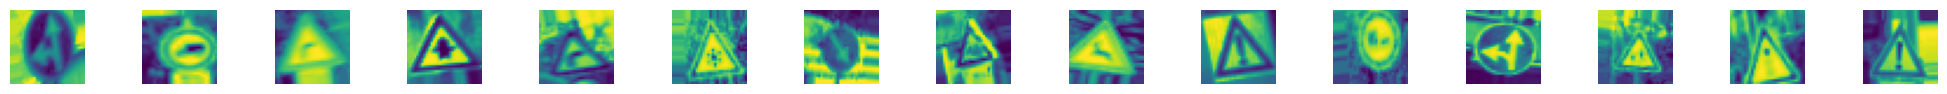

In [11]:
dataGen= ImageDataGenerator(width_shift_range=0.1,  
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20) 
X_batch,y_batch = next(batches)
 
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()
 
 
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

In [12]:
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout

def myModel(regularization_type='l2', regularization_strength=0.01, dropout_rate=0.2):
    no_Of_Filters=60
    size_of_Filter=(5,5)
                         
    size_of_Filter2=(3,3)
    size_of_pool=(2,2) 
    no_Of_Nodes = 500   
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu', kernel_regularizer=l2(regularization_strength))))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu', kernel_regularizer=l2(regularization_strength))))
    model.add(MaxPooling2D(pool_size=size_of_pool)) 
    model.add(Dropout(dropout_rate))

    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu', kernel_regularizer=l2(regularization_strength))))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu', kernel_regularizer=l2(regularization_strength))))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(dropout_rate))
 
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu', kernel_regularizer=l2(regularization_strength)))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(noOfClasses,activation='softmax')) 
    
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model


In [13]:
model = myModel()
print(model.summary())
history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 60)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                        

C:\Users\owais akmad khan\AppData\Local\Temp\ipykernel_20016\383310100.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)


668/668 [==============================] - 50s 74ms/step - loss: 3.5116 - accuracy: 0.1674 - val_loss: 1.7954 - val_accuracy: 0.5478
Epoch 2/55
668/668 [==============================] - 50s 75ms/step - loss: 2.2755 - accuracy: 0.4474 - val_loss: 1.2919 - val_accuracy: 0.7720
Epoch 3/55
668/668 [==============================] - 52s 78ms/step - loss: 1.9449 - accuracy: 0.5524 - val_loss: 1.1240 - val_accuracy: 0.8144
Epoch 4/55
668/668 [==============================] - 48s 72ms/step - loss: 1.7760 - accuracy: 0.6099 - val_loss: 1.0031 - val_accuracy: 0.8659
Epoch 5/55
668/668 [==============================] - 50s 75ms/step - loss: 1.6839 - accuracy: 0.6427 - val_loss: 0.9563 - val_accuracy: 0.8849
Epoch 6/55
668/668 [==============================] - 46s 69ms/step - loss: 1.6182 - accuracy: 0.6659 - val_loss: 0.9105 - val_accuracy: 0.9090
Epoch 7/55
668/668 [==============================] - 46s 69ms/step - loss: 1.5564 - accuracy: 0.6853 - val_loss: 0.9178 - val_accuracy: 0.8873
Epo

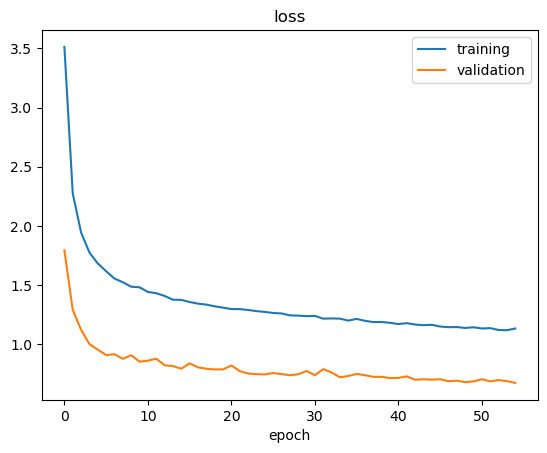

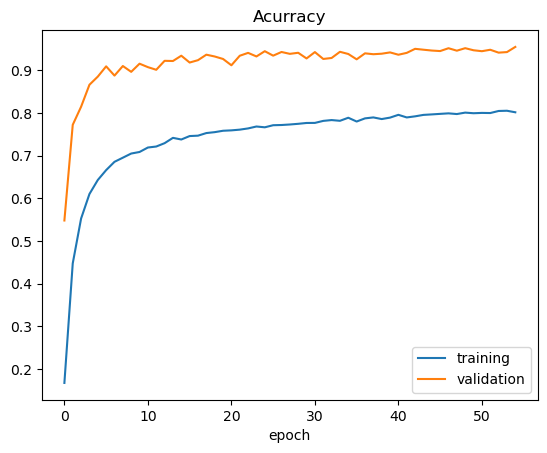

Test Score: 0.6819390654563904
Test Accuracy: 0.9555788040161133


In [14]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])
 

In [15]:
model.save('tra_fficmodel.h5')